# "Comparison of different trading strategies on crypto market"

## Pershina Polina

#### Import Data

In [2]:
import pandas as pd
import numpy as np
import datetime
import requests
import pandas as pd
import matplotlib.pyplot as plt
import math 
from termcolor import colored as cl

%matplotlib inline

from tabulate import tabulate
import warnings
warnings.filterwarnings('ignore')


# import package
import pandas_datareader.data as web



In [3]:
# limit=375

url = 'https://min-api.cryptocompare.com/data/histoday?fsym=BTC&tsym=USDT&limit=2000&aggregate=1&e=Binance'
page = requests.get(url)
data = page.json()['Data']
df = pd.DataFrame(data)

df['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df.time]
df.index = pd.to_datetime(df.timestamp)


df

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,timestamp
timestamp,,,,,,,,,,
2017-12-19 03:00:00,1513641600,17295.20,18950.00,16300.00,18856.25,12628.02,2.226790e+08,force_direct,,2017-12-19 03:00:00
2017-12-20 03:00:00,1513728000,16488.98,17720.35,14777.66,17295.20,12787.63,2.104275e+08,force_direct,,2017-12-20 03:00:00
2017-12-21 03:00:00,1513814400,15492.64,17309.50,14022.00,16488.98,19677.98,3.102216e+08,force_direct,,2017-12-21 03:00:00
2017-12-22 03:00:00,1513900800,13326.61,15699.34,10961.00,15492.64,33474.46,4.435878e+08,force_direct,,2017-12-22 03:00:00
2017-12-23 03:00:00,1513987200,13300.00,14950.00,12978.18,13326.61,12442.98,1.749772e+08,force_direct,,2017-12-23 03:00:00
...,...,...,...,...,...,...,...,...,...,...
2023-06-07 03:00:00,1686096000,26339.34,27391.77,26125.01,27230.08,59675.13,1.590761e+09,force_direct,,2023-06-07 03:00:00
2023-06-08 03:00:00,1686182400,26498.61,26810.00,26210.00,26339.34,31140.75,8.247686e+08,force_direct,,2023-06-08 03:00:00
2023-06-09 03:00:00,1686268800,26477.81,26783.33,26269.91,26498.61,27934.71,7.411582e+08,force_direct,,2023-06-09 03:00:00


In [4]:
url = 'https://min-api.cryptocompare.com/data/histoday?fsym=ETH&tsym=USDT&limit=2000&aggregate=1&e=Binance'
page = requests.get(url)
data = page.json()['Data']
df2 = pd.DataFrame(data)

df2['timestamp'] = [datetime.datetime.fromtimestamp(d) for d in df2.time]
df2.index = pd.to_datetime(df2.timestamp)


df2

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,timestamp
timestamp,,,,,,,,,,
2017-12-19 03:00:00,1513641600,798.00,864.90,729.01,784.00,67327.99,5.347597e+07,force_direct,,2017-12-19 03:00:00
2017-12-20 03:00:00,1513728000,790.21,828.00,661.00,798.00,70407.61,5.400697e+07,force_direct,,2017-12-20 03:00:00
2017-12-21 03:00:00,1513814400,782.41,845.99,705.98,790.21,76879.84,6.100702e+07,force_direct,,2017-12-21 03:00:00
2017-12-22 03:00:00,1513900800,635.97,796.00,504.99,782.41,148327.91,9.470758e+07,force_direct,,2017-12-22 03:00:00
2017-12-23 03:00:00,1513987200,640.34,714.99,627.97,635.97,77123.34,5.246681e+07,force_direct,,2017-12-23 03:00:00
...,...,...,...,...,...,...,...,...,...,...
2023-06-07 03:00:00,1686096000,1832.13,1897.80,1821.18,1884.64,430096.55,7.985137e+08,force_direct,,2023-06-07 03:00:00
2023-06-08 03:00:00,1686182400,1845.64,1861.28,1828.31,1832.13,189996.37,3.505086e+08,force_direct,,2023-06-08 03:00:00
2023-06-09 03:00:00,1686268800,1840.37,1855.00,1827.00,1845.64,198324.33,3.650378e+08,force_direct,,2023-06-09 03:00:00


In [5]:
df['close']

timestamp
2017-12-19 03:00:00    17295.20
2017-12-20 03:00:00    16488.98
2017-12-21 03:00:00    15492.64
2017-12-22 03:00:00    13326.61
2017-12-23 03:00:00    13300.00
                         ...   
2023-06-07 03:00:00    26339.34
2023-06-08 03:00:00    26498.61
2023-06-09 03:00:00    26477.81
2023-06-10 03:00:00    25841.21
2023-06-11 03:00:00    26045.65
Name: close, Length: 2001, dtype: float64

### Breakout Strategy

- Upper Donchain: $max(highs[t-N:t])$
- Lower Donchain: $min(lows[t-N:t])$
- Middle Donchain: $\frac{Upper Donchian + Lower Donchain}{2}$

Go long when the price breaks through the upper channel and short or exit the trade if it breaks below the lower channel. Because we're looking at high prices, we'll define a breakout as a close that's greater than yesterday's Donchian bound

In [92]:
df_b = df.copy()

def calcDonchianChannels(data: pd.DataFrame, period: int):
  data["upperDon"] = data["high"].rolling(period).max()
  data["lowerDon"] = data["low"].rolling(period).min()
  data["midDon"] = (data["upperDon"] + data["lowerDon"]) / 2
  return data

df_b = calcDonchianChannels(df_b, 20)
df_b.tail()

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,timestamp,...,three_candle_high,four_candle_high,three_candle_low,four_candle_low,long_positions,short_positions,positions,upperDon,lowerDon,midDon
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-06-07 03:00:00,1686096000,26339.34,27391.77,26125.01,27230.08,59675.13,1.590761e+09,force_direct,,2023-06-07 03:00:00,...,27391.77,False,25351.02,False,0,0,0,28447.14,25351.02,26899.08
2023-06-08 03:00:00,1686182400,26498.61,26810.00,26210.00,26339.34,31140.75,8.247686e+08,force_direct,,2023-06-08 03:00:00,...,27391.77,False,25351.02,False,0,0,0,28447.14,25351.02,26899.08
2023-06-09 03:00:00,1686268800,26477.81,26783.33,26269.91,26498.61,27934.71,7.411582e+08,force_direct,,2023-06-09 03:00:00,...,27391.77,False,26125.01,False,0,0,0,28447.14,25351.02,26899.08
2023-06-10 03:00:00,1686355200,25841.21,26533.87,25358.00,26477.81,64963.47,1.674279e+09,force_direct,,2023-06-10 03:00:00,...,26810.00,False,25358.00,True,0,0,0,28447.14,25351.02,26899.08
2023-06-11 03:00:00,1686441600,26045.65,26080.74,25634.70,25841.21,23079.74,5.957903e+08,force_direct,,2023-06-11 03:00:00,...,26783.33,False,25358.00,False,0,0,0,28447.14,25351.02,26899.08


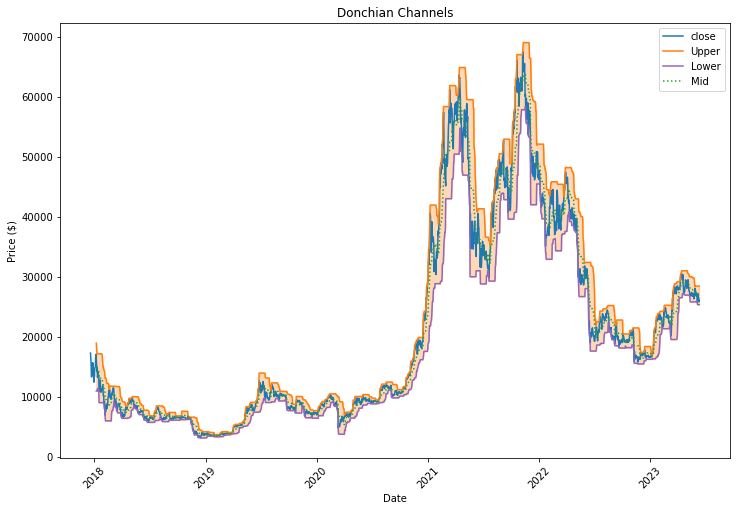

In [110]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

plt.figure(figsize=(12, 8))
plt.plot(df_b["close"], label="close")
plt.plot(df_b["upperDon"], label="Upper", c=colors[1])
plt.plot(df_b["lowerDon"], label="Lower", c=colors[4])
plt.plot(df_b["midDon"], label="Mid", c=colors[2], linestyle=":")
plt.fill_between(df_b.index, df_b["upperDon"], df_b["lowerDon"], alpha=0.3,
                 color=colors[1])

plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.title(f"Donchian Channels")
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [94]:
def midDonCrossOver(data: pd.DataFrame, period: int=20, shorts: bool=True):
  data = calcDonchianChannels(data, period)

  data["position"] = np.nan
  data["position"] = np.where(data["close"]>data["midDon"], 1, 
                              data["position"])
  if shorts:
    data["position"] = np.where(data["close"]<data["midDon"], -1, 
                                data["position"])
  else:
    data["position"] = np.where(data["close"]<data["midDon"], 0, 
                                data["position"])
  data["position"] = data["position"].ffill().fillna(0)

  return calcReturns(data)

def calcReturns(df):
  df['returns'] = df['close'] / df['close'].shift(1)
  df['log_returns'] = np.log(df['returns'])
  df['strat_returns'] = df['position'].shift(1) * df['returns']
  df['strat_log_returns'] = df['position'].shift(1) * \
      df['log_returns']
  df['cum_returns'] = np.exp(df['log_returns'].cumsum()) - 1
  df['strat_cum_returns'] = np.exp(
      df['strat_log_returns'].cumsum()) - 1
  df['peak'] = df['cum_returns'].cummax()
  df['strat_peak'] = df['strat_cum_returns'].cummax()
  return df

def getStratStats(log_returns: pd.Series,
  risk_free_rate: float = 0.02):
  stats = {}  # Total Returns
  stats['tot_returns'] = np.exp(log_returns.sum()) - 1  
  
  # Mean Annual Returns
  stats['annual_returns'] = np.exp(log_returns.mean() * 252) - 1  
  
  # Annual Volatility
  stats['annual_volatility'] = log_returns.std() * np.sqrt(252)
  
  # Sortino Ratio
  annualized_downside = log_returns.loc[log_returns<0].std() * \
    np.sqrt(252)
  stats['sortino_ratio'] = (stats['annual_returns'] - \
    risk_free_rate) / annualized_downside  
  
  # Sharpe Ratio
  stats['sharpe_ratio'] = (stats['annual_returns'] - \
    risk_free_rate) / stats['annual_volatility']  
  
  # Max Drawdown
  cum_returns = log_returns.cumsum() - 1
  peak = cum_returns.cummax()
  drawdown = peak - cum_returns
  max_idx = drawdown.argmax()
  stats['max_drawdown'] = 1 - np.exp(cum_returns[max_idx]) \
    / np.exp(peak[max_idx])
  
  # Max Drawdown Duration
  strat_dd = drawdown[drawdown==0]
  strat_dd_diff = strat_dd.index[1:] - strat_dd.index[:-1]
  strat_dd_days = strat_dd_diff.map(lambda x: x.days).values
  strat_dd_days = np.hstack([strat_dd_days,
    (drawdown.index[-1] - strat_dd.index[-1]).days])
  stats['max_drawdown_duration'] = strat_dd_days.max()
  return {k: np.round(v, 4) if type(v) == np.float_ else v
          for k, v in stats.items()}

def donChannelBreakout(data, period=20, shorts=True):
  data = calcDonchianChannels(data, period)
  
  data["position"] = np.nan
  data["position"] = np.where(data["close"]>data["upperDon"].shift(1), 1, 
                              data["position"])
  if shorts:
    data["position"] = np.where(
      data["close"]<data["lowerDon"].shift(1), -1, data["position"])
  else:
    data["position"] = np.where(
      data["close"]<data["lowerDon"].shift(1), 0, data["position"])
      
  data["position"] = data["position"].ffill().fillna(0)
  
  return calcReturns(data)

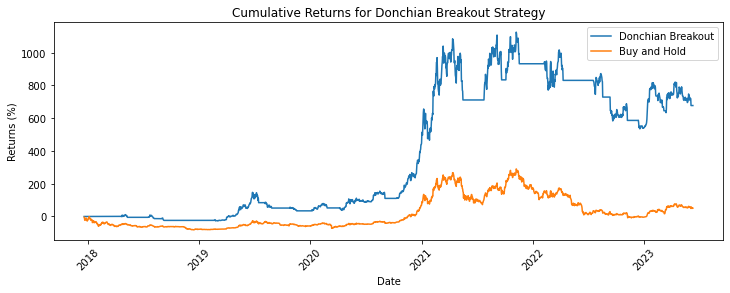

,tot_returns,annual_returns,annual_volatility,sortino_ratio,sharpe_ratio,max_drawdown,max_drawdown_duration
Buy and Hold,0.5059,0.0529,0.6231,0.0647,0.0529,0.8118,1046
Donchian Breakout,6.7755,0.2949,0.3989,0.7305,0.6891,0.4819,580


In [95]:
breakout = donChannelBreakout(df_b.copy(), 20, shorts=False)

plt.figure(figsize=(12, 4))
plt.plot(breakout["strat_cum_returns"] * 100, label="Donchian Breakout")
plt.plot(breakout["cum_returns"] * 100, label="Buy and Hold")
plt.title("Cumulative Returns for Donchian Breakout Strategy")
plt.xlabel("Date")
plt.ylabel("Returns (%)")
plt.xticks(rotation=45)
plt.legend()

plt.show()

midDon = midDonCrossOver(df_b.copy(), 20, shorts=False)
stats = pd.DataFrame(getStratStats(midDon["log_returns"]), 
                     index=["Buy and Hold"])

stats = pd.concat([stats,
                   pd.DataFrame(getStratStats(breakout["strat_log_returns"]),
                               index=["Donchian Breakout"])])
stats

###  Scalping

##### ATR Breakout

I am finding out each minute where ATR surpasses its won 5 minute rolling mean. The minute when it surpasses, it is called ATR break out. A breakout means that short term volatility is higher than long term volatility.

##### Checking for direction of price movement

To check wether price is moving up, we will check:
- if the high price at the candle of ATR breakout is greater than the previous 3 candle high - we take the long position
- if low candle of breakout is lower than the 3 candle low before it then we take a short position

##### Generating Trade signals from crossovers

- +1 for long signals
- -1 for short signals


In [15]:
import talib 
import logging 
from kiteconnect import KiteConnect
import webbrowser

In [16]:
# Generating Strategy Signals

# Calculate the Average True Range(ATR)
df['ATR'] = talib.ATR(df['high'], df['low'],
                        df['close'], timeperiod=30)
# Calculate the rolling mean of ATR
df['ATR_MA_5'] = df['ATR'].rolling(5).mean()
# Flag the minutes where ATR breaks out its rolling mean
df['ATR_breakout'] = np.where((df['ATR'] > df['ATR_MA_5']), True, False)
# Calculate the three-candle rolling high
df['three_candle_high'] = df['high'].rolling(3).max()
# Check if the fourth candle is higher than the highest of the previous 3 candle
df['four_candle_high'] = np.where( df['high'] >
    df['three_candle_high'].shift(1), True, False)
# Calculate the three-candle rolling low
df['three_candle_low'] = df['low'].rolling(3).min()
# Check if the fourth candle is lower than the lowest of the previous 3 candles
df['four_candle_low'] = np.where( df['low'] <
    df['three_candle_low'].shift(1), True, False)
# Flag long positions
df['long_positions'] = np.where(df['ATR_breakout'] & df['four_candle_high'], 1, 0)
# Flag short positions
df['short_positions'] = np.where(df['ATR_breakout'] & df['four_candle_low'], -1, 0)
# Combine long and short  position flags
df['positions'] = df['long_positions'] + df['short_positions']


current_position = 0
stop_loss = ''
take_profit = ''
entry_time = np.nan
entry_price = np.nan
take_profit_threshold = 0.03
stop_loss_threshold = 0.01

trades = pd.DataFrame()

# Calculate the PnL for exit of a long position
def long_exit(df, time, entry_time, entry_price):
    pnl = round(df.loc[time, 'close'] - entry_price, 2)
    return pd.DataFrame([('Long',entry_time,entry_price,time,df.loc[time, 'close'],pnl)])
    
# Calculate the PnL for exit of a short position
def short_exit(df, time, entry_time, entry_price):
    pnl = round(entry_price - df.loc[time, 'close'], 2)
    return pd.DataFrame([('Short',entry_time,entry_price,time,df.loc[time, 'close'],pnl)])


for time in df.index:
    # ---------------------------------------------------------------------------------
    # Long Position
    if (current_position == 0) and (df.loc[time, 'positions'] == 1):
        current_position = 1
        entry_time = time
        entry_price = df.loc[time, 'close']
        stop_loss = entry_price * (1-stop_loss_threshold)
        take_profit = entry_price * (1+take_profit_threshold)

    # ---------------------------------------------------------------------------------
    # Long Exit
    elif (current_position == 1):
        # Check for sl and tp
        if df.loc[time, 'close'] < stop_loss or df.loc[time, 'close'] > take_profit:
            trade_details = long_exit(df, time, entry_time, entry_price)
            trades = trades.append(trade_details,ignore_index=True)
            current_position = 0

    # ---------------------------------------------------------------------------------
    # Short Position
    if (current_position == 0) and (df.loc[time, 'positions'] == -1):
        current_position = -1
        entry_price = df.loc[time, 'close']
        stop_loss = entry_price * (1+stop_loss_threshold)
        take_profit = entry_price * (1-take_profit_threshold)

    # ---------------------------------------------------------------------------------
    # Short Exit
    elif (current_position == -1):
        # Check for sl and tp
        if df.loc[time, 'close'] > stop_loss or df.loc[time, 'close'] < take_profit:
            trade_details = short_exit(df, time, entry_time, entry_price)
            trades = trades.append(trade_details,ignore_index=True)
            current_position = 0

    # ---------------------------------------------------------------------------------
    
    
# Dataframe showing the details of the each trade in the dataset
# Generating dataframe for the 1 minute data 
trades.columns=['Position','Entry Time','Entry Price','Exit Time','Exit Price','PnL']
trades.head()

,Position,Entry Time,Entry Price,Exit Time,Exit Price,PnL
0,Long,2018-04-25 03:00:00,8869.99,2018-04-26 03:00:00,9266.00,396.01
1,Short,2018-04-25 03:00:00,9266.00,2018-04-27 03:00:00,8915.35,350.65
2,Short,2018-04-25 03:00:00,6764.99,2018-06-11 03:00:00,6872.00,-107.01
3,Short,2018-04-25 03:00:00,6530.00,2018-06-13 03:00:00,6292.78,237.22
4,Short,2018-04-25 03:00:00,6045.00,2018-06-23 03:00:00,6149.98,-104.98


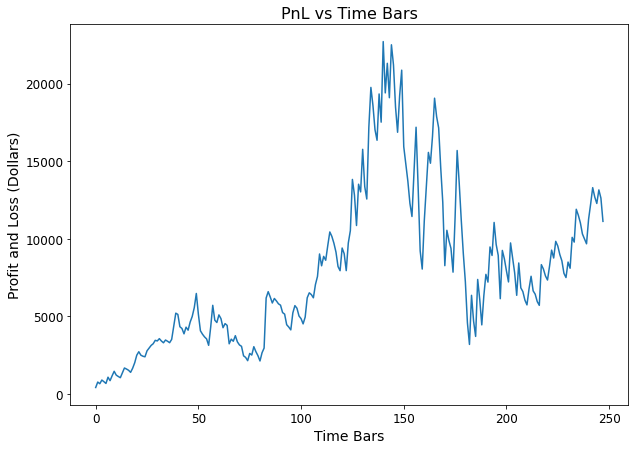

In [17]:
# Define the figure size for the plot
plt.figure(figsize=(10, 7))

# Define the label for the title of the figure
plt.title("PnL vs Time Bars", fontsize=16)

# Define the labels for x-axis and y-axis
plt.xlabel("Time Bars", fontsize=14)
plt.ylabel("Profit and Loss (Dollars)", fontsize=14)

# Define the tick size for x-axis and y-axis
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid()

# Plotting the cumulation of the returns on the dataset
trades.PnL.cumsum().plot()

plt.show()

In [18]:
analytics = pd.DataFrame(index=['ATR + Candle Breakout'])
# Number of long trades
analytics['num_of_long'] = len(trades.loc[trades.Position=='Long'])
# Number of short trades
analytics['num_of_short'] = len(trades.loc[trades.Position=='Short'])
# Total number of trades
analytics['total_trades'] = analytics.num_of_long + analytics.num_of_short
# Profitable trades
analytics['winners'] = len(trades.loc[trades.PnL>0])
# Loss-making trades
analytics['losers'] = len(trades.loc[trades.PnL<=0])
# Win percentage
analytics['win_percentage'] = 100*analytics.winners/analytics.total_trades
# Loss percentage
analytics['loss_percentage'] = 100*analytics.losers/analytics.total_trades
# Per trade profit/loss of winning trades
analytics['per_trade_PnL_winners'] = trades.loc[trades.PnL>0].PnL.mean()
# Per trade profit/loss of losing trades
analytics['per_trade_PnL_losers'] = trades.loc[trades.PnL<=0].PnL.mean()

analytics.T

,ATR + Candle Breakout
num_of_long,124.000000
num_of_short,124.000000
total_trades,248.000000
winners,97.000000
losers,151.000000
win_percentage,39.112903
loss_percentage,60.887097
per_trade_PnL_winners,1370.812268
per_trade_PnL_losers,-807.006490


###  Moving Average Crossover Strategy

##### The formula for calculating the SMA:

The simple moving average = (sum of the an asset price over the past n periods) / (number of periods): $SMA = \frac{A_{1}+A_{2}+...+A_{n}}{n}$ , 

where: $A_{n} =$ the price of an asset at the period $n$,  $n = $ number of total periods

##### The formula for calculating the EMA:

EMA [today] = (α x Price [today] ) + ((1 — α) x EMA [yesterday] ):

Where: α = 2/(N + 1); N = the length of the window (moving average period); EMA [today] = the current EMA value; Price [today] = the current closing price; EMA [yesterday] = the previous EMA value

##### Generating Trade signals from crossovers

- When the short term moving average crosses above the long term moving average, this indicates a buy signal (set signal value as 1).
- Contrary, when the short term moving average crosses below the long term moving average, it may be a good moment to sell (set signal value as 0).

##### Implementation of the strategy:

I create a new column 'Signal' such that:
- if short term SMA is greater than long term SMA then set Signal value as 1 
- if long term SMA is greater than short term SMA then set it’s value as 0

I create new column 'Position' such that: 
- When 'Position' = 1, it implies that the Signal has changed from 0 to 1 meaning a short-term(faster) moving average has crossed above the long-term(slower) moving average, thereby triggering a buy call.
- When 'Position' = -1, it implies that the Signal has changed from 1 to 0 meaning a short-term(faster) moving average has crossed below the long-term(slower) moving average, thereby triggering a sell call.


In [54]:
def MovingAverageCrossStrategy(stock_symbol = 'BTC', start_date = '2018-01-01', end_date = '2020-01-01', 
                               short_window = 20, long_window = 50, moving_avg = 'SMA', display_table = True):
    '''
    The function takes the stock symbol, time-duration of analysis, 
    look-back periods and the moving-average type(SMA or EMA) as input 
    and returns the respective MA Crossover chart along with the buy/sell signals for the given period.
    '''
    # stock_symbol - (str)stock ticker as on CryptoCompare. Eg: 'ULTRACEMCO.NS' 
    # start_date - (str)start analysis from this date (format: 'YYYY-MM-DD') Eg: '2018-01-01'
    # end_date - (str)end analysis on this date (format: 'YYYY-MM-DD') Eg: '2020-01-01'
    # short_window - (int)lookback period for short-term moving average. Eg: 5, 10, 20 
    # long_window - (int)lookback period for long-term moving average. Eg: 50, 100, 200
    # moving_avg - (str)the type of moving average to use ('SMA' or 'EMA')
    # display_table - (bool)whether to display the date and price table at buy/sell positions(True/False)
    
                        
    # column names for long and short moving average columns
    short_window_col = str(short_window) + '_' + moving_avg
    long_window_col = str(long_window) + '_' + moving_avg  
  
    if moving_avg == 'SMA':
        # Create a short simple moving average column
        df[short_window_col] = df['close'].rolling(window = short_window, min_periods = 1).mean()

        # Create a long simple moving average column
        df[long_window_col] = df['close'].rolling(window = long_window, min_periods = 1).mean()

    elif moving_avg == 'EMA':
        # Create short exponential moving average column
        df[short_window_col] = df['close'].ewm(span = short_window, adjust = False).mean()

        # Create a long exponential moving average column
        df[long_window_col] = df['close'].ewm(span = long_window, adjust = False).mean()

    # create a new column 'Signal' such that if faster moving average is greater than slower moving average 
    # then set Signal as 1 else 0.
    df['Signal'] = 0.0  
    df['Signal'] = np.where(df[short_window_col] > df[long_window_col], 1.0, 0.0) 

    # create a new column 'Position' which is a day-to-day difference of the 'Signal' column. 
    df['Position'] = df['Signal'].diff()

    # plot close price, short-term and long-term moving averages
    plt.figure(figsize = (20,10))
    plt.tick_params(axis = 'both', labelsize = 14)
    df['close'].plot(color = 'k', lw = 1, label = 'Close Price')  
    df[short_window_col].plot(color = 'b', lw = 1, label = short_window_col)
    df[long_window_col].plot(color = 'g', lw = 1, label = long_window_col) 

    # plot 'buy' signals
    plt.plot(df[df['Position'] == 1].index, 
            df[short_window_col][df['Position'] == 1], 
            '^', markersize = 15, color = 'g', alpha = 0.7, label = 'buy')

    # plot 'sell' signals
    plt.plot(df[df['Position'] == -1].index, 
            df[short_window_col][df['Position'] == -1], 
            'v', markersize = 15, color = 'r', alpha = 0.7, label = 'sell')
    plt.ylabel('Price in $', fontsize = 16 )
    plt.xlabel('Date', fontsize = 16 )
    plt.title(str(stock_symbol) + ' - ' + str(moving_avg) + ' Crossover', fontsize = 20)
    plt.legend()
    plt.grid()
    plt.show()
    
    if display_table == True:
        df_pos = df[(df['Position'] == 1) | (df['Position'] == -1)]
        df_pos['Position'] = df_pos['Position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
        print(tabulate(df_pos[['close', short_window_col, long_window_col, 'Signal', 'Position']], headers = 'keys', tablefmt = 'psql'))

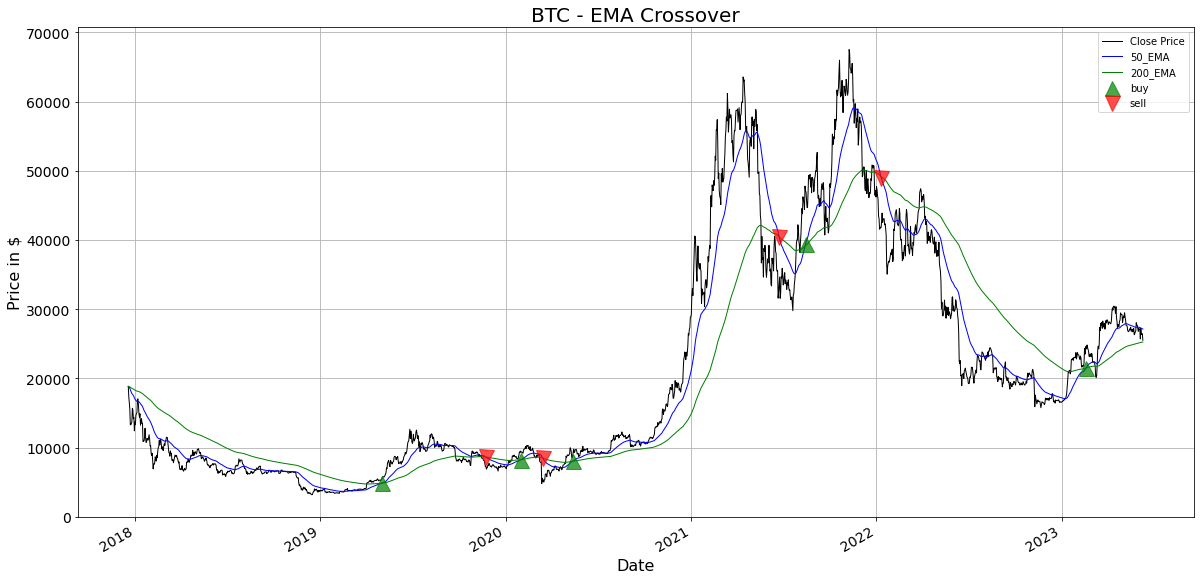

+---------------------+----------+----------+-----------+----------+------------+
| timestamp           |    close |   50_EMA |   200_EMA |   Signal | Position   |
|---------------------+----------+----------+-----------+----------+------------|
| 2019-05-03 03:00:00 |  5772.69 |  4895.07 |   4877.26 |        1 | Buy        |
| 2019-11-23 03:00:00 |  7311.57 |  8625.9  |   8647.98 |        0 | Sell       |
| 2020-01-31 03:00:00 |  9352.89 |  8279.39 |   8267.82 |        1 | Buy        |
| 2020-03-14 03:00:00 |  5172.06 |  8495.62 |   8497.4  |        0 | Sell       |
| 2020-05-13 03:00:00 |  9309.37 |  8063.31 |   8043.4  |        1 | Buy        |
| 2021-06-23 03:00:00 | 33678.1  | 40417.6  |  40468.9  |        0 | Sell       |
| 2021-08-14 03:00:00 | 47068.5  | 39424.4  |  39210.1  |        1 | Buy        |
| 2022-01-10 03:00:00 | 41822.5  | 49035.9  |  49177.8  |        0 | Sell       |
| 2023-02-18 03:00:00 | 24632    | 21542.7  |  21508.6  |        1 | Buy        |
+---------------

In [55]:
MovingAverageCrossStrategy('BTC', '2020-08-31', '2021-08-31', 50, 200, 'EMA', display_table = True)

###  MACD Crossover Strategy

##### MACD Line: 

MACD LINE = FAST LENGTH EMA - SLOW LENGTH EMA

##### Signal Line:

This line is the Exponential Moving Average of the MACD line itself for a given period of time. The most popular period to calculate the Signal line is 9. As we are averaging out the MACD line itself, the Signal line will be smoother than the MACD line.

##### Histogram:

HISTOGRAM = MACD LINE - SIGNAL LINE

##### Generating Trade signals from crossovers

- If MACD LINE > SIGNAL LINE $-$ buy the stock
- If SIGNAL LINE > MACD LINE $-$ sell the stock

##### Implementation of the strategy:

I create new column 'macd_position' such that: 
- The value of the position remains 1 if we hold the stock
- The value of the position remains 0 if we sold or don’t own the stock

In [146]:
# MACD Calculation

#the stock’s price (‘price’)
#length of the slow EMA (‘slow’)
#length of the fast EMA (‘fast’)
#the period of the Signal line (‘smooth’).

def get_macd(price, slow, fast, smooth):
    exp1 = price.ewm(span = fast, adjust = False).mean()
    exp2 = price.ewm(span = slow, adjust = False).mean()
    macd = pd.DataFrame(exp1 - exp2).rename(columns = {'close':'macd'})
    signal = pd.DataFrame(macd.ewm(span = smooth, adjust = False).mean()).rename(columns = {'macd':'signal'})
    hist = pd.DataFrame(macd['macd'] - signal['signal']).rename(columns = {0:'hist'})
    frames =  [macd, signal, hist]
    df = pd.concat(frames, join = 'inner', axis = 1)
    return df

dfMACD = get_macd(df['close'], 26, 12, 9)


#Creating the Trading Strategy

# stock prices (‘prices’)
# MACD data (‘data’) 

def implement_macd_strategy(prices, data):    
    buy_price = []
    sell_price = []
    macd_signal = []
    signal = 0

    for i in range(len(data)):
        if data['macd'][i] > data['signal'][i]: # condition to buy the stock gets satisfied
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                macd_signal.append(signal)
            else: 
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        elif data['macd'][i] < data['signal'][i]: # condition to sell the stock gets satisfied
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                macd_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                macd_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            macd_signal.append(0)
            
    return buy_price, sell_price, macd_signal
            
buy_price, sell_price, macd_signal = implement_macd_strategy(df['close'], dfMACD)


# Creating our Position

position = []
for i in range(len(dfMACD)): #generating values for the ‘position’ list to just match the length of the ‘signal’ list
    if macd_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['close'])): #generating actual position values
    if macd_signal[i] == 1:
        position[i] = 1 #the value of the position remains 1 if we hold the stock 
    elif macd_signal[i] == -1:
        position[i] = 0 #remains 0 if we sold or don’t own the stock
    else:
        position[i] = position[i-1]
        
macd = dfMACD['macd']
signal = dfMACD['signal']
close_price = df['close']
macd_signal = pd.DataFrame(macd_signal).rename(columns = {0:'macd_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'macd_position'}).set_index(df.index)

frames = [close_price, macd, signal, macd_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy

,close,macd,signal,macd_signal,macd_position
timestamp,,,,,
2017-12-18 03:00:00,18856.25,0.000000,0.000000,0,1
2017-12-19 03:00:00,17295.20,-124.528205,-24.905641,-1,0
2017-12-20 03:00:00,16488.98,-284.987760,-76.922065,0,0
2017-12-21 03:00:00,15492.64,-486.936325,-158.924917,0,0
2017-12-22 03:00:00,13326.61,-812.397721,-289.619478,0,0
...,...,...,...,...,...
2023-06-06 03:00:00,27230.08,-198.032570,-200.401680,1,1
2023-06-07 03:00:00,26339.34,-235.031195,-207.327583,-1,0
2023-06-08 03:00:00,26498.61,-248.635004,-215.589068,0,0


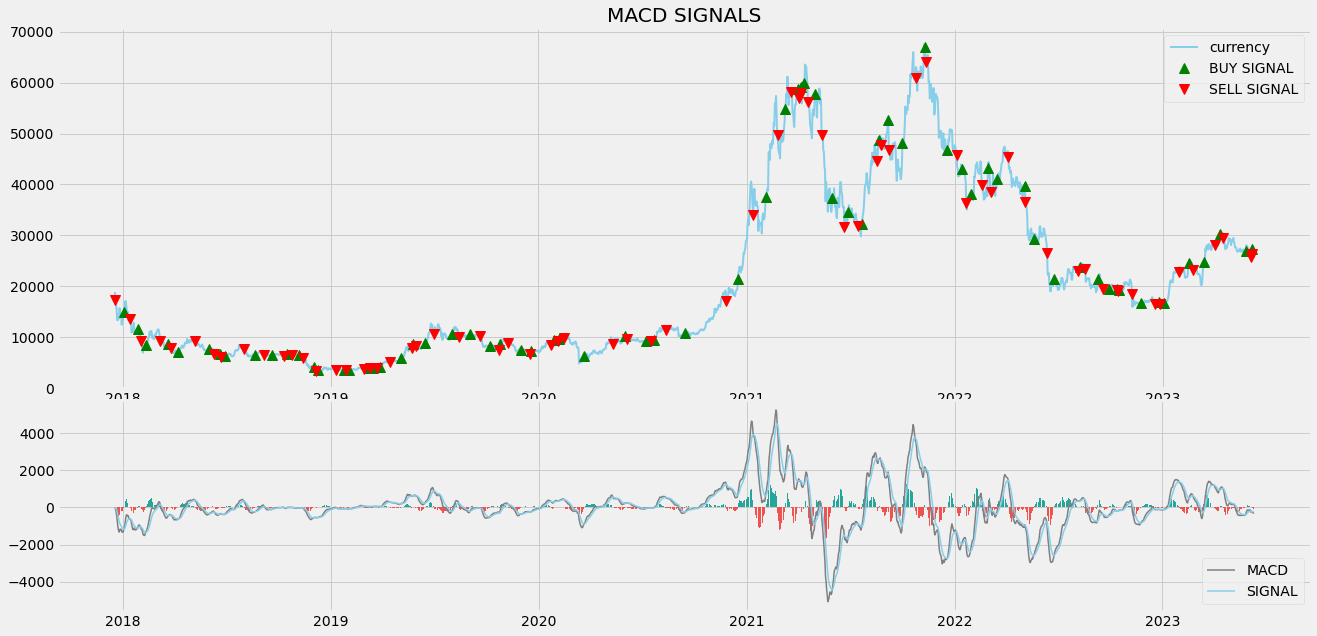

In [147]:
# Plotting the Trading Lists

plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('fivethirtyeight')

ax1 = plt.subplot2grid((8,1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((8,1), (5,0), rowspan = 3, colspan = 1)

ax1.plot(df['close'], color = 'skyblue', linewidth = 2, label = 'currency')
ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend()
ax1.set_title('MACD SIGNALS')
ax2.plot(dfMACD['macd'], color = 'grey', linewidth = 1.5, label = 'MACD')
ax2.plot(dfMACD['signal'], color = 'skyblue', linewidth = 1.5, label = 'SIGNAL')

for i in range(len(dfMACD)):
    if str(dfMACD['hist'][i])[0] == '-':
        ax2.bar(dfMACD.index[i], dfMACD['hist'][i], color = '#ef5350')
    else:
        ax2.bar(dfMACD.index[i], dfMACD['hist'][i], color = '#26a69a')
        
plt.legend(loc = 'lower right')
plt.show()

In [148]:
# Backtesting

df_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'}) # calculating the returns
macd_strategy_ret = []

for i in range(len(df_ret)): #calculating the returns we gained from our MACD trading strategy
    try:
        returns = df_ret['returns'][i]*strategy['macd_position'][i]
        macd_strategy_ret.append(returns)
    except:
        pass
    
# converting the ‘macd_strategy_ret’ list into a dataframe and stored it into the ‘macd_strategy_ret_df’ variable    
macd_strategy_ret_df = pd.DataFrame(macd_strategy_ret).rename(columns = {0:'macd_returns'})


# Calculating Profit Percentage

investment_value = 100000 # the investment amount
number_of_stocks = floor(investment_value/df['close'][0]) #calculating the number of stocks we can buy using the investment amount 
macd_investment_ret = []

for i in range(len(macd_strategy_ret_df['macd_returns'])): #finding the investment returns followed by some data manipulations tasks
    returns = number_of_stocks*macd_strategy_ret_df['macd_returns'][i]
    macd_investment_ret.append(returns)

macd_investment_ret_df = pd.DataFrame(macd_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(macd_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

print(cl('Profit percentage of the MACD strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit percentage of the MACD strategy : 98%


###  Pair Trading Strategy

As a pair I have hosen BTC - ETH

##### Trading sognals 
- buy the spread when it gets “too low” 
- sell the spread when it gets “too high”

Use the z-score to normalize the spread and use it as the trade signal

In [329]:
# Model the spread
S1 = df['close']
S2 = df2['close']

S1 = sm.add_constant(S1)
results = sm.OLS(S2, S1).fit()
S1 = S1.close
b = results.params['close']
spread = S2 - b * S1

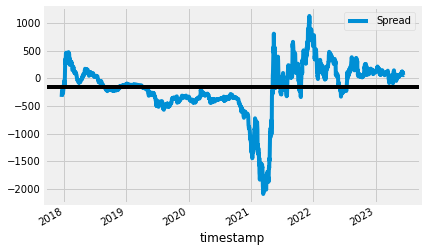

In [330]:
# Pllot the spread
spread.plot()
plt.axhline(spread.mean(), color='black')
plt.legend(['Spread']);

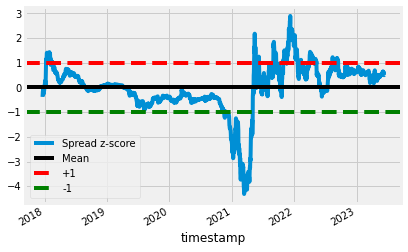

In [331]:
#Model the spread
def zscore(series):
    return (series - series.mean()) / np.std(series)

zscore(spread).plot()
plt.axhline(zscore(spread).mean(), color='black')
plt.axhline(1.0, color='red', linestyle='--')
plt.axhline(-1.0, color='green', linestyle='--')
plt.legend(['Spread z-score', 'Mean', '+1', '-1']);

In [332]:
# Create a DataFrmae with the signal and position size in the pair
# Use the z-score to normalize the spread and use it as the trade signal
trades = pd.concat([zscore(spread), S2 - b * S1], axis=1)
trades.columns = ["signal", "position"]

# Add a long and short position at the z-score levels
trades["side"] = 0.0
trades.loc[trades.signal <= -1, "side"] = 1
trades.loc[trades.signal >= 1, "side"] = -1

<AxesSubplot:xlabel='timestamp'>

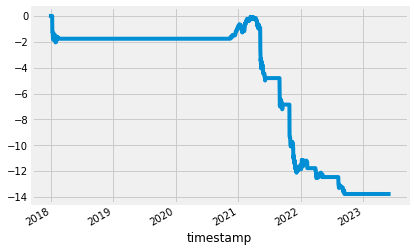

In [333]:
returns = trades.position.pct_change() * trades.side
returns.cumsum().plot()

This pair is consistently losing money. This could mean a few things. First, there is no linear combination that is stationary and we have a false positive. Or, there is no real economic relationship that drives the two stocks. 

###  RSI Mean-Reversion Strategy

##### Generating Trade signals from crossovers

- When the RSI indicator drops below 30 (oversold), I will buy
- When RSI exceeds above 70 (overbought), I will sell

For Exit, we will use the ATR Indicator. ATR measures the average range for each period and is therefore a good volatility indicator. After entering a trade, we will set take profit and stop loss to 2 ATR each

In [100]:
# Calculating RSI indicator
df_RSIMR = df.copy()
import plotly.express as px

# setting the RSI Period
rsi_period = 14

# to calculate RSI, we first need to calculate the exponential weighted aveage gain and loss during the period
df_RSIMR['gain'] = (df_RSIMR['close'] - df_RSIMR['open']).apply(lambda x: x if x > 0 else 0)
df_RSIMR['loss'] = (df_RSIMR['close'] - df_RSIMR['open']).apply(lambda x: -x if x < 0 else 0)

# here we use the same formula to calculate Exponential Moving Average
df_RSIMR['ema_gain'] = df_RSIMR['gain'].ewm(span=rsi_period, min_periods=rsi_period).mean()
df_RSIMR['ema_loss'] = df_RSIMR['loss'].ewm(span=rsi_period, min_periods=rsi_period).mean()

# the Relative Strength is the ratio between the exponential avg gain divided by the exponential avg loss
df_RSIMR['rs'] = df_RSIMR['ema_gain'] / df_RSIMR['ema_loss']

# the RSI is calculated based on the Relative Strength using the following formula
df_RSIMR['rsi_14'] = 100 - (100 / (df_RSIM['rs'] + 1))

# displaying the results
display(df_RSIMR[['time', 'rsi_14', 'rs', 'ema_gain', 'ema_loss']])

# plotting the RSI
fig_rsi = px.line(df_RSIMR, x='time', y='rsi_14', title='RSI Indicator')

# RSI commonly uses oversold and overbought levels, usually at 70 and 30
overbought_level = 70
orversold_level = 30

# adding oversold and overbought levels to the plot
fig_rsi.add_hline(y=overbought_level, opacity=0.5)
fig_rsi.add_hline(y=orversold_level, opacity=0.5)

# showing the RSI Figure
display(fig_rsi)

,time,rsi_14,rs,ema_gain,ema_loss
timestamp,,,,,
2017-12-19 03:00:00,1513641600,NaN,NaN,NaN,NaN
2017-12-20 03:00:00,1513728000,NaN,NaN,NaN,NaN
2017-12-21 03:00:00,1513814400,NaN,NaN,NaN,NaN
2017-12-22 03:00:00,1513900800,NaN,NaN,NaN,NaN
2017-12-23 03:00:00,1513987200,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-07 03:00:00,1686096000,42.945738,0.752717,273.248939,363.016617
2023-06-08 03:00:00,1686182400,45.061463,0.820216,258.051747,314.614401
2023-06-09 03:00:00,1686268800,44.811064,0.811957,223.644848,275.439148


In [101]:
# Calculating ATR indicator

atr_period = 14  # defining the atr period to 14

# calculating the range of each candle
df_RSIMR['range'] = df_RSIMR['high'] - df_RSIMR['low']

# calculating the average value of ranges
df_RSIMR['atr_14'] = df_RSIMR['range'].rolling(atr_period).mean()

display(df_RSIMR[['time', 'atr_14']])

# plotting the ATR Indicator
#fig_atr = px.line(df, x='time', y='atr_14', title='ATR Indicator')
#display(fig_atr)

,time,atr_14
timestamp,,
2017-12-19 03:00:00,1513641600,NaN
2017-12-20 03:00:00,1513728000,NaN
2017-12-21 03:00:00,1513814400,NaN
2017-12-22 03:00:00,1513900800,NaN
2017-12-23 03:00:00,1513987200,NaN
...,...,...
2023-06-07 03:00:00,1686096000,934.595000
2023-06-08 03:00:00,1686182400,923.160000
2023-06-09 03:00:00,1686268800,916.624286


In [102]:
#Backtesting
# class Position contain data about trades opened/closed during the backtest 
class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'
        
    def close_position(self, close_datetime, close_price):
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy' \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'
        
    def _asdict(self):
        return {
            'open_datetime': self.open_datetime,
            'open_price': self.open_price,
            'order_type': self.order_type,
            'volume': self.volume,
            'sl': self.sl,
            'tp': self.tp,
            'close_datetime': self.close_datetime,
            'close_price': self.close_price,
            'profit': self.profit,
            'status': self.status,
        }
        

# class Strategy defines trading logic and evaluates the backtest based on opened/closed positions
class Strategy:
    def __init__(self, df, starting_balance):
        self.starting_balance = starting_balance
        self.positions = []
        self.data = df
    
    # return backtest result
    def get_positions_df(self):
        df = pd.DataFrame([position._asdict() for position in self.positions])
        df['pnl'] = df['profit'].cumsum() + self.starting_balance
        return df
    
    # add Position class to list
    def add_position(self, position):
        self.positions.append(position)
        return True
    
    # close positions when stop loss or take profit is reached
    def close_tp_sl(self, data):
        for pos in self.positions:
                    if pos.status == 'open':
                        if (pos.sl >= data.close and pos.order_type == 'buy'):
                            pos.close_position(data.time, pos.sl)
                        elif (pos.sl <= data.close and pos.order_type == 'sell'):
                            pos.close_position(data.time, pos.sl)
                        elif (pos.tp <= data.close and pos.order_type == 'buy'):
                            pos.close_position(data.time, pos.tp)
                        elif (pos.tp >= data.close and pos.order_type == 'sell'):
                            pos.close_position(data.time, pos.tp)
                            
    # check for open positions
    def has_open_positions(self):
        for pos in self.positions:
            if pos.status == 'open':
                return True
        return False
    
    # strategy logic how positions should be opened/closed
    def logic(self, data):
        
        # if no position is open
        if not self.has_open_positions():
            
            # if RSI less then 30 -> BUY
            if data['rsi_14'] < 30:
                
                # Position variables
                open_datetime = data['time']
                open_price = data['close']
                order_type = 'buy'
                volume = 10000
                sl = open_price - 2 * data['atr_14']
                tp = open_price + 2 * data['atr_14']
                
                self.add_position(Position(open_datetime, open_price, order_type, volume, sl, tp))
            
            # if RSI greater than 70 -> SELL
            elif data['rsi_14'] > 70:
                
                # Position variables
                open_datetime = data['time']
                open_price = data['close']
                order_type = 'sell'
                volume = 10000
                sl = open_price + 2 * data['atr_14']
                tp = open_price - 2 * data['atr_14']
                
                self.add_position(Position(open_datetime, open_price, order_type, volume, sl, tp))
        
        
# logic
    def run(self):
        # data represents a moment in time while iterating through the backtest
        for i, data in self.data.iterrows():
            # close positions when stop loss or take profit is reached
            self.close_tp_sl(data)
            
            # strategy logic
            self.logic(data)
        
        return self.get_positions_df()
    
# preparing data for backtest
backtest_df = df_RSIMR[14:]  # removing NaN values
backtest_df

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,timestamp,...,short_positions,positions,gain,loss,ema_gain,ema_loss,rs,rsi_14,range,atr_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:00:00,1514851200,14675.11,15473.49,12890.02,13380.00,19323.86,2.690792e+08,force_direct,,2018-01-02 03:00:00,...,0,0,1295.11,0.00,485.276627,489.108465,0.992166,49.803371,2583.47,2374.945000
2018-01-03 03:00:00,1514937600,14919.51,15307.56,14150.00,14675.11,15324.48,2.274995e+08,force_direct,,2018-01-03 03:00:00,...,0,0,244.40,0.00,449.539357,416.542683,1.079216,51.904939,1157.56,2247.435714
2018-01-04 03:00:00,1515024000,15059.54,15280.00,13918.04,14919.51,20701.32,3.035727e+08,force_direct,,2018-01-04 03:00:00,...,0,0,140.03,0.00,404.299462,355.658102,1.136764,53.200268,1361.96,2109.897143
2018-01-05 03:00:00,1515110400,16960.39,17176.24,14400.00,15059.54,21727.09,3.448412e+08,force_direct,,2018-01-05 03:00:00,...,0,0,1900.85,0.00,620.273370,304.331489,2.038150,67.085238,2776.24,1969.747143
2018-01-06 03:00:00,1515196800,17069.79,17143.13,16011.21,16960.39,14467.86,2.410401e+08,force_direct,,2018-01-06 03:00:00,...,0,0,109.40,0.00,547.347754,260.889096,2.098009,67.721207,1131.92,1909.754286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07 03:00:00,1686096000,26339.34,27391.77,26125.01,27230.08,59675.13,1.590761e+09,force_direct,,2023-06-07 03:00:00,...,0,0,0.00,890.74,273.248939,363.016617,0.752717,42.945738,1266.76,934.595000
2023-06-08 03:00:00,1686182400,26498.61,26810.00,26210.00,26339.34,31140.75,8.247686e+08,force_direct,,2023-06-08 03:00:00,...,0,0,159.27,0.00,258.051747,314.614401,0.820216,45.061463,600.00,923.160000
2023-06-09 03:00:00,1686268800,26477.81,26783.33,26269.91,26498.61,27934.71,7.411582e+08,force_direct,,2023-06-09 03:00:00,...,0,0,0.00,20.80,223.644848,275.439148,0.811957,44.811064,513.42,916.624286


In [103]:
# creating an instance of Strategy class
rsi_strategy = Strategy(backtest_df, 10000)

# running the backtest
backtest_result = rsi_strategy.run()

backtest_result

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,1516060800,10900.00,buy,10000,6822.760000,14977.240000,1.522541e+09,6822.760000,-4.077240e+07,closed,-4.076240e+07
1,1522540800,6813.01,buy,10000,5635.241429,7990.778571,1.523664e+09,7990.778571,1.177769e+07,closed,-2.898471e+07
2,1523750400,8355.00,sell,10000,9292.717143,7417.282857,1.524528e+09,9292.717143,-9.377171e+06,closed,-3.836189e+07
3,1524528000,9622.02,sell,10000,10596.018571,8648.021429,1.525997e+09,8648.021429,9.739986e+06,closed,-2.862190e+07
4,1526515200,8041.46,buy,10000,7104.412857,8978.507143,1.527466e+09,7104.412857,-9.370471e+06,closed,-3.799237e+07
...,...,...,...,...,...,...,...,...,...,...,...
99,1678752000,24670.41,sell,10000,26941.402857,22399.417143,1.679011e+09,26941.402857,-2.270993e+07,closed,-4.281296e+08
100,1679011200,27395.13,sell,10000,29969.614286,24820.645714,1.681171e+09,29969.614286,-2.574484e+07,closed,-4.538745e+08
101,1681171200,30200.42,sell,10000,32024.555714,28376.284286,1.681949e+09,28376.284286,1.824136e+07,closed,-4.356331e+08
102,1682035200,27262.84,buy,10000,25303.261429,29222.418571,1.682554e+09,29222.418571,1.959579e+07,closed,-4.160373e+08


###  RSI Momentum Strategy

##### Generating Trade signals from crossovers

- When the RSI indicator drops below 45 (oversold), I will buy
- When RSI exceeds above 55 (overbought), I will sell

For Exit, we will use the ATR Indicator. ATR measures the average range for each period and is therefore a good volatility indicator. After entering a trade, we will set take profit and stop loss to 2 ATR each

In [104]:
# Calculating RSI indicator
df_RSIM = df.copy()
import plotly.express as px

# setting the RSI Period
rsi_period = 14

# to calculate RSI, we first need to calculate the exponential weighted aveage gain and loss during the period
df_RSIM['gain'] = (df_RSIM['close'] - df_RSIM['open']).apply(lambda x: x if x > 0 else 0)
df_RSIM['loss'] = (df_RSIM['close'] - df_RSIM['open']).apply(lambda x: -x if x < 0 else 0)

# here we use the same formula to calculate Exponential Moving Average
df_RSIM['ema_gain'] = df_RSIM['gain'].ewm(span=rsi_period, min_periods=rsi_period).mean()
df_RSIM['ema_loss'] = df_RSIM['loss'].ewm(span=rsi_period, min_periods=rsi_period).mean()

# the Relative Strength is the ratio between the exponential avg gain divided by the exponential avg loss
df_RSIM['rs'] = df_RSIM['ema_gain'] / df_RSIM['ema_loss']

# the RSI is calculated based on the Relative Strength using the following formula
df_RSIM['rsi_14'] = 100 - (100 / (df_RSIM['rs'] + 1))

# displaying the results
display(df_RSIM[['time', 'rsi_14', 'rs', 'ema_gain', 'ema_loss']])

# plotting the RSI
fig_rsi = px.line(df_RSIM, x='time', y='rsi_14', title='RSI Indicator')

# RSI commonly uses oversold and overbought levels, usually at 70 and 30
overbought_level = 55
orversold_level = 45

# adding oversold and overbought levels to the plot
fig_rsi.add_hline(y=overbought_level, opacity=0.5)
fig_rsi.add_hline(y=orversold_level, opacity=0.5)

# showing the RSI Figure
display(fig_rsi)

,time,rsi_14,rs,ema_gain,ema_loss
timestamp,,,,,
2017-12-19 03:00:00,1513641600,NaN,NaN,NaN,NaN
2017-12-20 03:00:00,1513728000,NaN,NaN,NaN,NaN
2017-12-21 03:00:00,1513814400,NaN,NaN,NaN,NaN
2017-12-22 03:00:00,1513900800,NaN,NaN,NaN,NaN
2017-12-23 03:00:00,1513987200,NaN,NaN,NaN,NaN
...,...,...,...,...,...
2023-06-07 03:00:00,1686096000,42.945738,0.752717,273.248939,363.016617
2023-06-08 03:00:00,1686182400,45.061463,0.820216,258.051747,314.614401
2023-06-09 03:00:00,1686268800,44.811064,0.811957,223.644848,275.439148


In [105]:
# Calculating ATR indicator

atr_period = 14  # defining the atr period to 14

# calculating the range of each candle
df_RSIM['range'] = df_RSIM['high'] - df_RSIM['low']

# calculating the average value of ranges
df_RSIM['atr_14'] = df_RSIM['range'].rolling(atr_period).mean()

display(df_RSIM[['time', 'atr_14']])

# plotting the ATR Indicator
#fig_atr = px.line(df, x='time', y='atr_14', title='ATR Indicator')
#display(fig_atr)

,time,atr_14
timestamp,,
2017-12-19 03:00:00,1513641600,NaN
2017-12-20 03:00:00,1513728000,NaN
2017-12-21 03:00:00,1513814400,NaN
2017-12-22 03:00:00,1513900800,NaN
2017-12-23 03:00:00,1513987200,NaN
...,...,...
2023-06-07 03:00:00,1686096000,934.595000
2023-06-08 03:00:00,1686182400,923.160000
2023-06-09 03:00:00,1686268800,916.624286


In [106]:
#Backtesting
# class Position contain data about trades opened/closed during the backtest 
class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'
        
    def close_position(self, close_datetime, close_price):
        self.close_datetime = close_datetime
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy' \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'
        
    def _asdict(self):
        return {
            'open_datetime': self.open_datetime,
            'open_price': self.open_price,
            'order_type': self.order_type,
            'volume': self.volume,
            'sl': self.sl,
            'tp': self.tp,
            'close_datetime': self.close_datetime,
            'close_price': self.close_price,
            'profit': self.profit,
            'status': self.status,
        }
        

# class Strategy defines trading logic and evaluates the backtest based on opened/closed positions
class Strategy:
    def __init__(self, df, starting_balance):
        self.starting_balance = starting_balance
        self.positions = []
        self.data = df
    
    # return backtest result
    def get_positions_df(self):
        df = pd.DataFrame([position._asdict() for position in self.positions])
        df['pnl'] = df['profit'].cumsum() + self.starting_balance
        return df
    
    # add Position class to list
    def add_position(self, position):
        self.positions.append(position)
        return True
    
    # close positions when stop loss or take profit is reached
    def close_tp_sl(self, data):
        for pos in self.positions:
                    if pos.status == 'open':
                        if (pos.sl >= data.close and pos.order_type == 'buy'):
                            pos.close_position(data.time, pos.sl)
                        elif (pos.sl <= data.close and pos.order_type == 'sell'):
                            pos.close_position(data.time, pos.sl)
                        elif (pos.tp <= data.close and pos.order_type == 'buy'):
                            pos.close_position(data.time, pos.tp)
                        elif (pos.tp >= data.close and pos.order_type == 'sell'):
                            pos.close_position(data.time, pos.tp)
                            
    # check for open positions
    def has_open_positions(self):
        for pos in self.positions:
            if pos.status == 'open':
                return True
        return False
    
    # strategy logic how positions should be opened/closed
    def logic(self, data):
        
        # if no position is open
        if not self.has_open_positions():
            
            # if RSI less then 30 -> BUY
            if data['rsi_14'] < 30:
                
                # Position variables
                open_datetime = data['time']
                open_price = data['close']
                order_type = 'buy'
                volume = 10000
                sl = open_price - 2 * data['atr_14']
                tp = open_price + 2 * data['atr_14']
                
                self.add_position(Position(open_datetime, open_price, order_type, volume, sl, tp))
            
            # if RSI greater than 70 -> SELL
            elif data['rsi_14'] > 70:
                
                # Position variables
                open_datetime = data['time']
                open_price = data['close']
                order_type = 'sell'
                volume = 10000
                sl = open_price + 2 * data['atr_14']
                tp = open_price - 2 * data['atr_14']
                
                self.add_position(Position(open_datetime, open_price, order_type, volume, sl, tp))
        
        
# logic
    def run(self):
        # data represents a moment in time while iterating through the backtest
        for i, data in self.data.iterrows():
            # close positions when stop loss or take profit is reached
            self.close_tp_sl(data)
            
            # strategy logic
            self.logic(data)
        
        return self.get_positions_df()
    
# preparing data for backtest
backtest_df = df_RSIM[14:]  # removing NaN values
backtest_df

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,timestamp,...,short_positions,positions,gain,loss,ema_gain,ema_loss,rs,rsi_14,range,atr_14
timestamp,,,,,,,,,,,,,,,,,,,,,
2018-01-02 03:00:00,1514851200,14675.11,15473.49,12890.02,13380.00,19323.86,2.690792e+08,force_direct,,2018-01-02 03:00:00,...,0,0,1295.11,0.00,485.276627,489.108465,0.992166,49.803371,2583.47,2374.945000
2018-01-03 03:00:00,1514937600,14919.51,15307.56,14150.00,14675.11,15324.48,2.274995e+08,force_direct,,2018-01-03 03:00:00,...,0,0,244.40,0.00,449.539357,416.542683,1.079216,51.904939,1157.56,2247.435714
2018-01-04 03:00:00,1515024000,15059.54,15280.00,13918.04,14919.51,20701.32,3.035727e+08,force_direct,,2018-01-04 03:00:00,...,0,0,140.03,0.00,404.299462,355.658102,1.136764,53.200268,1361.96,2109.897143
2018-01-05 03:00:00,1515110400,16960.39,17176.24,14400.00,15059.54,21727.09,3.448412e+08,force_direct,,2018-01-05 03:00:00,...,0,0,1900.85,0.00,620.273370,304.331489,2.038150,67.085238,2776.24,1969.747143
2018-01-06 03:00:00,1515196800,17069.79,17143.13,16011.21,16960.39,14467.86,2.410401e+08,force_direct,,2018-01-06 03:00:00,...,0,0,109.40,0.00,547.347754,260.889096,2.098009,67.721207,1131.92,1909.754286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-07 03:00:00,1686096000,26339.34,27391.77,26125.01,27230.08,59675.13,1.590761e+09,force_direct,,2023-06-07 03:00:00,...,0,0,0.00,890.74,273.248939,363.016617,0.752717,42.945738,1266.76,934.595000
2023-06-08 03:00:00,1686182400,26498.61,26810.00,26210.00,26339.34,31140.75,8.247686e+08,force_direct,,2023-06-08 03:00:00,...,0,0,159.27,0.00,258.051747,314.614401,0.820216,45.061463,600.00,923.160000
2023-06-09 03:00:00,1686268800,26477.81,26783.33,26269.91,26498.61,27934.71,7.411582e+08,force_direct,,2023-06-09 03:00:00,...,0,0,0.00,20.80,223.644848,275.439148,0.811957,44.811064,513.42,916.624286


In [107]:
# creating an instance of Strategy class
rsi_strategy = Strategy(backtest_df, 10000)

# running the backtest
backtest_result = rsi_strategy.run()

backtest_result

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,status,pnl
0,1516060800,10900.00,buy,10000,6822.760000,14977.240000,1.522541e+09,6822.760000,-4.077240e+07,closed,-4.076240e+07
1,1522540800,6813.01,buy,10000,5635.241429,7990.778571,1.523664e+09,7990.778571,1.177769e+07,closed,-2.898471e+07
2,1523750400,8355.00,sell,10000,9292.717143,7417.282857,1.524528e+09,9292.717143,-9.377171e+06,closed,-3.836189e+07
3,1524528000,9622.02,sell,10000,10596.018571,8648.021429,1.525997e+09,8648.021429,9.739986e+06,closed,-2.862190e+07
4,1526515200,8041.46,buy,10000,7104.412857,8978.507143,1.527466e+09,7104.412857,-9.370471e+06,closed,-3.799237e+07
...,...,...,...,...,...,...,...,...,...,...,...
99,1678752000,24670.41,sell,10000,26941.402857,22399.417143,1.679011e+09,26941.402857,-2.270993e+07,closed,-4.281296e+08
100,1679011200,27395.13,sell,10000,29969.614286,24820.645714,1.681171e+09,29969.614286,-2.574484e+07,closed,-4.538745e+08
101,1681171200,30200.42,sell,10000,32024.555714,28376.284286,1.681949e+09,28376.284286,1.824136e+07,closed,-4.356331e+08
102,1682035200,27262.84,buy,10000,25303.261429,29222.418571,1.682554e+09,29222.418571,1.959579e+07,closed,-4.160373e+08


### Trend Following Strategy

In [109]:
stock=df.copy()
stock.close=stock.close.shift(1)
stock.tail()

,time,close,high,low,open,volumefrom,volumeto,conversionType,conversionSymbol,timestamp,ATR,ATR_MA_5,ATR_breakout,three_candle_high,four_candle_high,three_candle_low,four_candle_low,long_positions,short_positions,positions
timestamp,,,,,,,,,,,,,,,,,,,,
2023-06-07 03:00:00,1686096000,27230.08,27391.77,26125.01,27230.08,59675.13,1.590761e+09,force_direct,,2023-06-07 03:00:00,953.264869,913.695768,True,27391.77,False,25351.02,False,0,0,0
2023-06-08 03:00:00,1686182400,26339.34,26810.00,26210.00,26339.34,31140.75,8.247686e+08,force_direct,,2023-06-08 03:00:00,941.489373,924.015376,True,27391.77,False,25351.02,False,0,0,0
2023-06-09 03:00:00,1686268800,26498.61,26783.33,26269.91,26498.61,27934.71,7.411582e+08,force_direct,,2023-06-09 03:00:00,927.220394,934.053664,False,27391.77,False,26125.01,False,0,0,0
2023-06-10 03:00:00,1686355200,26477.81,26533.87,25358.00,26477.81,64963.47,1.674279e+09,force_direct,,2023-06-10 03:00:00,935.508714,939.987608,False,26810.00,False,25358.00,True,0,0,0
2023-06-11 03:00:00,1686441600,25841.21,26080.74,25634.70,25841.21,23079.74,5.957903e+08,force_direct,,2023-06-11 03:00:00,919.193090,935.335288,False,26783.33,False,25358.00,False,0,0,0


In [ ]:
# Trade using a simple trend following strategy
def trade(stock, length):

    temp_dict = {}
    # If window length is 0, algorithm doesn't make sense, so exit
    if length == 0:
        return 0

    # Compute rolling mean and rolling standard deviation
    rolling_window = stock.close.rolling(window=length)
    mu = rolling_window.mean()
    std = rolling_window.std()

    #If you don't use a maximum position size the positions will keep on pyramidding.
    #Set max_position to a high number (1000?) to disable this parameter
    max_position =1
    
    #Slippage and commission adjustment  - simply reduces equity by a percentage guess
    slippage_adj=0.99

    # Compute the z-scores for each day using the historical data up to that day
    zscores = (stock.close - mu) / std

    # Simulate trading
    # Start with your chosen starting capital and no positions
    money = 30
    position_count = 0

    for i, row in enumerate(stock.itertuples(),0):

        # Sell short if the z-score is > 1
        if zscores[i] >  1 and position_count < max_position:
            money -= stock.open[i] *(1/slippage_adj)
            position_count += 1
        # Buy long if the z-score is < 1
        elif zscores[i] < -1 and position_count > max_position * -1:
            # print (position_count)
            money += stock.open[i] *slippage_adj
            position_count -= 1
        # Clear positions if the z-score between -.5 and .5
        elif abs(zscores[i]) < 0.5:
            if position_count > 0:                
                money += position_count * stock.open[i]*slippage_adj  
            elif position_count < 0: 
                money += position_count * stock.open[i]*(1/slippage_adj)              
            position_count = 0
        #fill dictionary with the trading results.
        temp_dict[stock.date[i]] = [
            stock.open[i], stock.close[i], mu[i], std[i], zscores[i],
            money, position_count,stock.open[i] *(1/slippage_adj),stock.open[i] *slippage_adj
        ]
    #create a dataframe to return for use in calculating and charting the trading results
    pr = pd.DataFrame(data=temp_dict).T
    pr.index.name = 'Date'
    pr.index = pd.to_datetime(pr.index)
    pr.columns = [
        'open', 'close', 'mu', 'std', 'zscores', 'money', 'position_count','buy_slippage','sell_slippage'
    ]
    pr['equity'] = pr.money + (pr.open * pr.position_count)
    #
    return pr


In [ ]:
moving_average=200
profit = trade(stock, moving_average)

In [ ]:
series=profit[['equity']].copy()
series=series[moving_average:-1]
#series.head()

In [ ]:
stats = series.calc_stats()
#stats.display()

###  Bollinger Bands Strategy

- UPPER_BB = STOCK SMA + SMA STANDARD DEVIATION * 2
- LOWER_BB = STOCK SMA - SMA STANDARD DEVIATION * 2

##### Strategy
I am going to implement a basic trading strategy using the Bollinger Bands indicator which will shoot a buy signal if the stock price of the previous day is greater than the previous day's lower band and the current stock price is lesser than the current day’s lower band. Similarly, if the stock price of the previous day is lesser than the previous day’s upper band and the current stock price is greater than the current day’s upper band, the strategy will reveal a sell signal. 

##### Generating Trade signals from crossovers
- IF PREV_STOCK > PREV_LOWERBB & CUR_STOCK < CUR_LOWER_BB $-$ BUY
- IF PREV_STOCK < PREV_UPPERBB & CUR_STOCK > CUR_UPPER_BB $-$ SELL

- UPPER_BB = STOCK SMA + SMA STANDARD DEVIATION * 2
- LOWER_BB = STOCK SMA - SMA STANDARD DEVIATION * 2


##### Implementation of the strategy:

I create new column 'macd_position' such that: 
- The value of the position remains 1 if we hold the stock
- The value of the position remains 0 if we sold or don’t own the stock


In [150]:
# Calculating SMA values, SMA is nothing but the average price of a stock given a specified period of time
def sma(data, window):
    sma = data.rolling(window = window).mean()
    return sma

df['sma_bb'] = sma(df['close'], 20)

# Calculating Bollinger Bands
def bb(data, sma, window):
    std = data.rolling(window = window).std()
    upper_bb = sma + std * 2
    lower_bb = sma - std * 2
    return upper_bb, lower_bb

df['upper_bb'], df['lower_bb'] = bb(df['close'], df['sma_bb'], 20)


#Creating the trading strategy

def implement_bb_strategy(data, lower_bb, upper_bb):
    buy_price = []
    sell_price = []
    bb_signal = []
    signal = 0
    
    for i in range(len(data)):
        if data[i-1] > lower_bb[i-1] and data[i] < lower_bb[i]: # condition to buy the stock gets satisfied
            if signal != 1:
                buy_price.append(data[i])
                sell_price.append(np.nan)
                signal = 1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        elif data[i-1] < upper_bb[i-1] and data[i] > upper_bb[i]:# condition to sell the stock gets satisfied
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(data[i])
                signal = -1
                bb_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                bb_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            bb_signal.append(0)
            
    return buy_price, sell_price, bb_signal

buy_price, sell_price, bb_signal = implement_bb_strategy(df['close'], df['lower_bb'], df['upper_bb'])

# Creating our Position

position = []
for i in range(len(bb_signal)): #generating values for the ‘position’ list to just match the length of the ‘signal’ list
    if bb_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['close'])): #generating actual position values
    if bb_signal[i] == 1:
        position[i] = 1 #the value of the position remains 1 if we hold the stock 
    elif bb_signal[i] == -1:
        position[i] = 0 #the value of the position remains 0 if we sold or don’t own the stock
    else:
        position[i] = position[i-1]
        
upper_bb = df['upper_bb']
lower_bb = df['lower_bb']
close_price = df['close']
bb_signal = pd.DataFrame(bb_signal).rename(columns = {0:'bb_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'bb_position'}).set_index(df.index)

frames = [close_price, upper_bb, lower_bb, bb_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)
strategy = strategy.reset_index()

strategy

,timestamp,close,upper_bb,lower_bb,bb_signal,bb_position
0,2017-12-18 03:00:00,18856.25,NaN,NaN,0,1
1,2017-12-19 03:00:00,17295.20,NaN,NaN,0,1
2,2017-12-20 03:00:00,16488.98,NaN,NaN,0,1
3,2017-12-21 03:00:00,15492.64,NaN,NaN,0,1
4,2017-12-22 03:00:00,13326.61,NaN,NaN,0,1
...,...,...,...,...,...,...
1996,2023-06-06 03:00:00,27230.08,28021.554437,25967.745563,0,1
1997,2023-06-07 03:00:00,26339.34,28036.464141,25904.641859,0,1
1998,2023-06-08 03:00:00,26498.61,28037.659947,25865.281053,0,1
1999,2023-06-09 03:00:00,26477.81,28023.931266,25816.547734,0,1


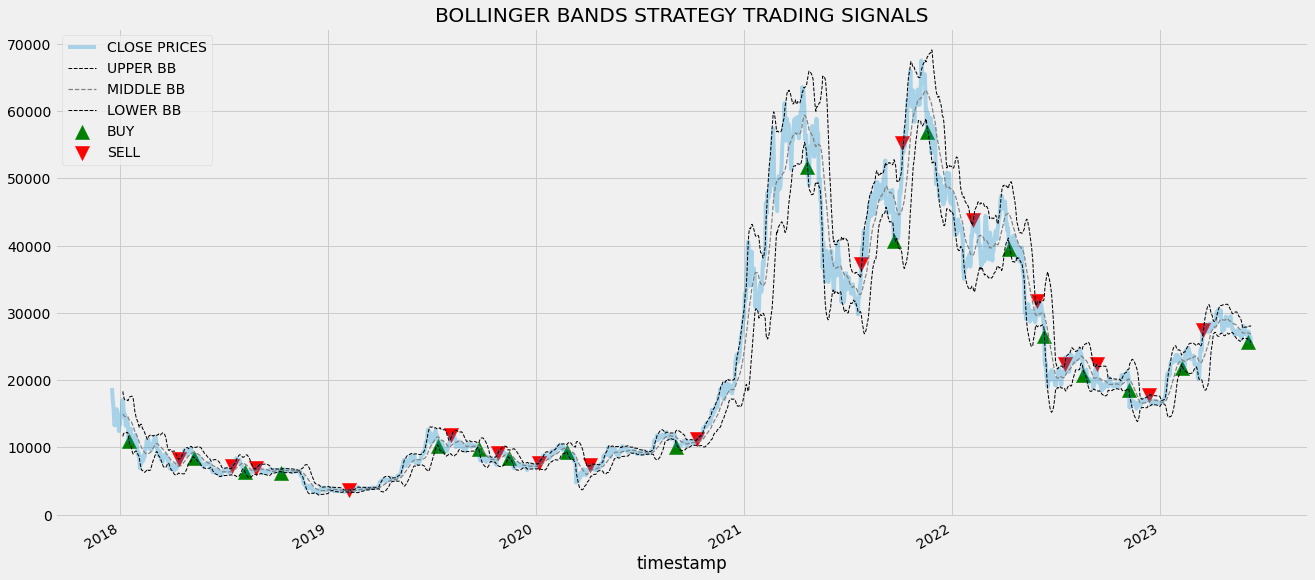

In [151]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (20, 10)


df['close'].plot(label = 'CLOSE PRICES', alpha = 0.3)
df['upper_bb'].plot(label = 'UPPER BB', linestyle = '--', linewidth = 1, color = 'black')
df['sma_bb'].plot(label = 'MIDDLE BB', linestyle = '--', linewidth = 1.2, color = 'grey')
df['lower_bb'].plot(label = 'LOWER BB', linestyle = '--', linewidth = 1, color = 'black')
plt.scatter(df.index, buy_price, marker = '^', color = 'green', label = 'BUY', s = 200)
plt.scatter(df.index, sell_price, marker = 'v', color = 'red', label = 'SELL', s = 200)
plt.title('BOLLINGER BANDS STRATEGY TRADING SIGNALS')
plt.legend(loc = 'upper left')
plt.show()

In [152]:
# Backtesting

df_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'}) # calculating the returns
bb_strategy_ret = []

for i in range(len(df_ret)): #calculating the returns we gained from our BB trading strategy
    try:
        returns = df_ret['returns'][i]*strategy['bb_position'][i]
        bb_strategy_ret.append(returns)
    except:
        pass
    
# converting the ‘bb_strategy_ret’ list into a dataframe and stored it into the ‘bb_strategy_ret_df’ variable    
bb_strategy_ret_df = pd.DataFrame(bb_strategy_ret).rename(columns = {0:'bb_returns'})


# Calculating Profit Percentage

investment_value = 100000 # the investment amount
number_of_stocks = floor(investment_value/df['close'][0]) #calculating the number of stocks we can buy using the investment amount 
bb_investment_ret = []

for i in range(len(bb_strategy_ret_df['bb_returns'])): #finding the investment returns followed by some data manipulations tasks
    returns = number_of_stocks*bb_strategy_ret_df['bb_returns'][i]
    bb_investment_ret.append(returns)

bb_investment_ret_df = pd.DataFrame(bb_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(bb_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

print(cl('Profit percentage of the BB strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit percentage of the BB strategy : -163%


###  Stochastic Oscillator Strategy

##### %K Line: 

This line is the most important and core component of the Stochastic Oscillator indicator. This line is calculated by subtracting the lowest price the stock has reached over a specified number of periods from the closing price of the stock and this difference is then divided by the value calculated by subtracting the lowest price the stock has reached over a specified number of periods from the highest stock price. The final value is arrived at by multiplying the value calculated from the above-mentioned steps by 100. The way to calculate the %K line with the most popular setting of 14 as the number of periods can be represented as follows:

%K = 100 * ((14 DAY CLOSING PRICE - 14 DAY LOWEST PRICE) - (14 DAY HIGHEST PRICE - 14 DAY LOWEST PRICE))

##### %D Line:

The moving average of the %K line for a specified period. The standard setting of the %D line is 3 as the number of periods.

#####  Strategy:

Reveal a buy signal when:

- The %K line is below 20
- The %D line is below 20
- The %K line is below %D line

Reveal a sell signal when:

- The %K line is above 80
- The %D line is above 80
- The %K line is above %D line



##### Implementation of the strategy:

I create new column 'macd_position' such that: 
- The value of the position remains 1 if we hold the stock
- The value of the position remains 0 if we sold or don’t own the stock

In [175]:
# Extracting the Stochastic Oscillator values
df['14-high'] = df['high'].rolling(14).max()
df['14-low'] = df['low'].rolling(14).min()
df['%K'] = (df['close'] - df['14-low'])*100/(df['14-high'] - df['14-low'])
df['%D'] = df['%K'].rolling(3).mean()


# Creating the trading strategy

def implement_stoch_strategy(prices, k, d):    
    buy_price = []
    sell_price = []
    stoch_signal = []
    signal = 0

    for i in range(len(prices)):
        if k[i] < 20 and d[i] < 20 and k[i] < d[i]:# condition to buy the stock gets satisfied
            if signal != 1:
                buy_price.append(prices[i])
                sell_price.append(np.nan)
                signal = 1
                stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                stoch_signal.append(0)
        elif k[i] > 80 and d[i] > 80 and k[i] > d[i]: # condition to sell the stock gets satisfied
            if signal != -1:
                buy_price.append(np.nan)
                sell_price.append(prices[i])
                signal = -1
                stoch_signal.append(signal)
            else:
                buy_price.append(np.nan)
                sell_price.append(np.nan)
                stoch_signal.append(0)
        else:
            buy_price.append(np.nan)
            sell_price.append(np.nan)
            stoch_signal.append(0)
            
    return buy_price, sell_price, stoch_signal
            
buy_price, sell_price, stoch_signal = implement_stoch_strategy(df['close'], df['%K'], df['%D'])


# Creating our Position

position = []
for i in range(len(stoch_signal)): #generating values for the ‘position’ list to just match the length of the ‘signal’ list
    if stoch_signal[i] > 1:
        position.append(0)
    else:
        position.append(1)
        
for i in range(len(df['close'])): #generating actual position values
    if stoch_signal[i] == 1:
        position[i] = 1 #the value of the position remains 1 if we hold the stock 
    elif stoch_signal[i] == -1:
        position[i] = 0 #the value of the position remains 0 if we sold or don’t own the stock
    else:
        position[i] = position[i-1]
        
k = df['%K']
d = df['%D']
close_price = df['close']
stoch_signal = pd.DataFrame(stoch_signal).rename(columns = {0:'stoch_signal'}).set_index(df.index)
position = pd.DataFrame(position).rename(columns = {0:'stoch_position'}).set_index(df.index)

frames = [close_price, k, d, stoch_signal, position]
strategy = pd.concat(frames, join = 'inner', axis = 1)

strategy.tail()

,close,%K,%D,stoch_signal,stoch_position
timestamp,,,,,
2023-06-06 03:00:00,27230.08,60.690800,40.030386,0,1
2023-06-07 03:00:00,26339.34,31.921243,34.577605,0,1
2023-06-08 03:00:00,26498.61,37.065424,43.225822,0,1
2023-06-09 03:00:00,26477.81,36.393615,35.126761,0,1
2023-06-10 03:00:00,25522.45,5.536930,26.331990,0,1


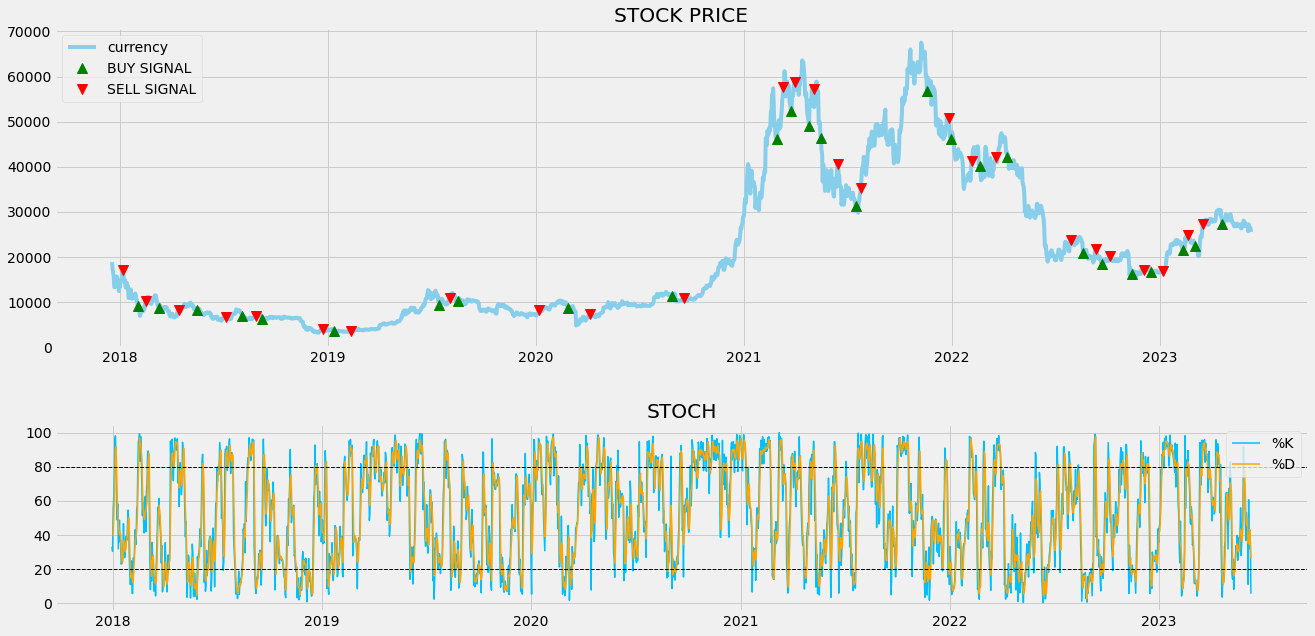

In [176]:
# Plotting

ax1 = plt.subplot2grid((9, 1), (0,0), rowspan = 5, colspan = 1)
ax2 = plt.subplot2grid((9, 1), (6,0), rowspan = 3, colspan = 1)
ax1.plot(df['close'], color = 'skyblue', label = 'currency')
ax1.plot(df.index, buy_price, marker = '^', color = 'green', markersize = 10, label = 'BUY SIGNAL', linewidth = 0)
ax1.plot(df.index, sell_price, marker = 'v', color = 'r', markersize = 10, label = 'SELL SIGNAL', linewidth = 0)
ax1.legend(loc = 'upper left')
ax1.set_title('STOCK PRICE')
ax2.plot(df['%K'], color = 'deepskyblue', linewidth = 1.5, label = '%K')
ax2.plot(df['%D'], color = 'orange', linewidth = 1.5, label = '%D')
ax2.axhline(80, color = 'black', linewidth = 1, linestyle = '--')
ax2.axhline(20, color = 'black', linewidth = 1, linestyle = '--')
ax2.set_title('STOCH')
ax2.legend()
plt.show()

In [179]:
# Backtesting

df_ret = pd.DataFrame(np.diff(df['close'])).rename(columns = {0:'returns'}) # calculating the returns
stoch_strategy_ret = []

for i in range(len(df_ret)): #calculating the returns we gained from our SO trading strategy
    try:
        returns = df_ret['returns'][i]*strategy['stoch_position'][i]
        stoch_strategy_ret.append(returns)
    except:
        pass
    
# converting the ‘bb_strategy_ret’ list into a dataframe and stored it into the ‘stoch_strategy_ret_df’ variable    
stoch_strategy_ret_df = pd.DataFrame(stoch_strategy_ret).rename(columns = {0:'stoch_returns'})


# Calculating Profit Percentage

investment_value = 100000 # the investment amount
number_of_stocks = floor(investment_value/df['close'][0]) #calculating the number of stocks we can buy using the investment amount 
stoch_investment_ret = []

for i in range(len(stoch_strategy_ret_df['stoch_returns'])): #finding the investment returns followed by some data manipulations tasks
    returns = number_of_stocks*stoch_strategy_ret_df['stoch_returns'][i]
    stoch_investment_ret.append(returns)

stoch_investment_ret_df = pd.DataFrame(stoch_investment_ret).rename(columns = {0:'investment_returns'})
total_investment_ret = round(sum(stoch_investment_ret_df['investment_returns']), 2)
profit_percentage = floor((total_investment_ret/investment_value)*100)

print(cl('Profit percentage of the SO strategy : {}%'.format(profit_percentage), attrs = ['bold']))

Profit percentage of the SO strategy : -2%
